# Simple Neural Net: back-propogation

This notebook will attempt to do some simple backpropogation of the neural network introduced in the previous (and initial) notebook on the Simple NN.

## What is back-propogation?

Back-propogation the way we optimise Neural networks like this. It involves the construction of a minimisation problem where the inputs are our weights (we'll show how we construct this later). We then solve this minimisation with gradient descent algorithm (you can see some applications and analysis of them in my repo on optimisation.)

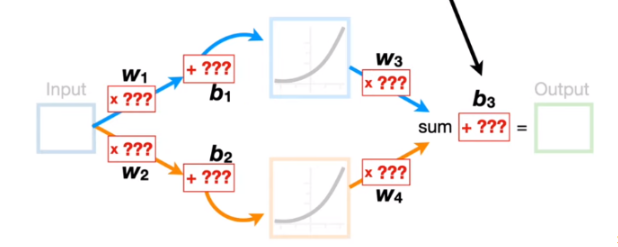
Source: Youtube: Statquest - Neural Networks Pt. 2: Backpropagation Main Ideas   https://www.youtube.com/watch?v=IN2XmBhILt4&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=5

### So, what is the minimisation function?

In theory, we want our function (the one that we're trying to minimise) to reach it's minimum when our curve matches the our training data. For example, if we had three points like this: 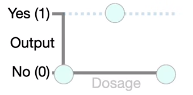

Then we would want our curve to pass through those three points. There are many possibilities for such a curve, but as an example it could be something like this green curve here:
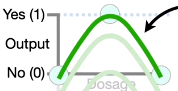

One simple way to get this behaviour would be to use the following function


$$
SSR = \sum_{i=0}^{n} (Observed_i - Predicted_i)^2 
$$

We call ths function the sum of the squared residuals ($SSR$), where a residule is difference between an observed (training) value and its predicted value 

$$ Res_i = Observed_i - Predicted_i $$ 

our minimisation algorithm would then be able to do it's magic on the "function" to find the input parameter combination that minimises the function as long as we can find the gradients.


### How do we find the gradients?

Good question. This involves the chain rule which is a standard tool of attack in differentiation. 

We want to find $\frac{\delta SSR}{\delta Predicted}$

We have, we have that the $SSR$ depends on each of the weights and biases, so we can make our way through the network to calculate our derivatives:



Now this is a good example

we have that the curve "$Pred$" is constructed by all of the previous terms. I'll do this in a few steps to show you how it works:

1:

$$
Pred = (combined\ path) + bias_3
$$

2:

$$
Pred = (weight_3 * blue\ box) + (weight_4 * orange\ box) + bias_3
$$

3:

$$
Pred = (weight_3 * activation(input * weight_1 + bias_1)) + (weight_4 * activation(weight_2 * input + bias_2)) + bias_3
$$

At this point, I'm going to switch to b's, w's and f's (activation function) to make things more visually comprehensible. So this equation becomes:

$$
Pred = (w_3 * f(input * w_1 + b_1)) + (w_4 * f(input * w_2 + b_2)) + b_3
$$

Now we have something which shows us the relationship between each weight/bias of the network which is precisely each parameter of our $SSR$ function.

### Now we get to the chain rule

The chain rule tells us that for each weight $w_i$ and bias $b_i$:

$$
\frac{\delta SSR}{\delta w_i} = \frac{\delta SSR}{\delta Pred} * \frac{\delta Pred}{\delta w_i}
$$

However, because the Prediction function (the neural network) will depend on multiple steps, for each weight and bias, we must take every step into account. So for this notebook, we will work out the derivatives for each weight $w_i$ and bias $b_i$ on a case by case basis.


We'll start with $b_3$ which will be the simplest to calculate.


$$
\frac{\delta SSR}{\delta b_3} = \frac{\delta SSR}{\delta Pred} * \frac{\delta Pred}{\delta b_3}
$$

for the first term on the LHS, we have that: 

$$
SSR = \sum_{i=0}^{n} (Observed_i - Pred_i)^2 
$$

so if we differentiate with respect to $Pred$ by using the chain rule, we obtain

$$
\frac{\delta SSR}{\delta Pred} = \sum_{i=0}^{n} -2(Observed_i - Pred_i)
$$

and for our second term, we have:

$$
Pred = (path_1 + path_2) + b_3 
$$

so it's derivative with respect to b_3, is one


$$
\frac{\delta Pred}{\delta b_3} = 1
$$



This might look long and scary but luckily since we count all the other terms as constant, a lot of things will cancel out...

Because I'm now fearing that the notebook will get too long, I'm not going to hand calculate all of the gradients here, but I will do one of the more complicated ones and then hopefully, the method will be apparent. If you still have trouble understanding the in's and out's of it, I would strongly recommend this video by Statquest which explains it much better than I can here https://www.youtube.com/watch?v=iyn2zdALii8&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=7

### A more complicated derivative

Now we're gonna look at $w_1$ which is one of the chunkiest in this network. I'll try to explain this one a bit more than the last, so I hope I'll be able to make it clear.

We start with the same goal as before: find a computable form of $\frac{\delta SSR}{\delta w_1}$ that is worth more than just mathematical symbols on a page.

We're going to go a bit bonkers with the chain rule here because the input goes through a lot of loops to get from $w_1$ to our output at $SSR$. 

So first we'll take a look at our equation for Predicted to see what depends on $w_1$ in our prediction function.

$$
Pred = (w_3 * f(input * w_1 + b_1)) + (w_4 * f(input * w_2 + b_2)) + b_3
$$

I'm going to decompose this to get variables for the different stages. This allows us to abstract the problem to different levels so that it is more manageable and will be in a suitable form for us to differentiate with respect to the different operations on our input between $w_1$ and the output

In each step, I'll collapse something from the equation into a variable.

$$
1)\  Pred = (w_3 * f(x_1)) + (w_4 * f(x_2)) + b_3
$$
$$
2)\ Pred = (w_3 * y_1) + (w_4 * y_2) + b_3
$$

Where:


$$
x_1 = input * w_1 + b_1
$$
$$
y_1 = f(x_1) = log(1 + e^{x_1})
$$

Now we're in a position to apply the chain rule to $\frac{\delta SSR}{\delta w_1}$ to obtain:
$$
\frac{\delta SSR}{\delta w_1} = \frac{\delta SSR}{\delta Pred} * \frac{\delta Pred}{\delta y_1} * \frac{\delta x_2}{\delta x_1} * \frac{\delta x_1}{\delta w_1}
$$

Which looks excessively long but is actually what we want. And as a bonus, it's not too hard to compute term by term:

We get term 1 from before:

$$
\frac{\delta SSR}{\delta Pred} = \sum_{i=0}^{n} -2(Observed_i - Pred_i)
$$

Term two can be found from the second reduced prediction function equation

$$
Pred = (w_3 * y_1) + (w_4 * y_2) + b_3
$$

so

$$
\frac{\delta Pred}{\delta y_1} = w_3 
$$

Term 3 comes from our definition of y_1

$$
y_1 = f(x_1) = log(1 + e^{x_1})
$$

so by the chain rule, 

$$
\frac{\delta y_1}{\delta x_1} = e^{x_1} * \frac{1}{1 + e^{x_1}} = \frac{e^{x_1}}{1 + e^{x_1}}
$$


Then finally, from the definition of x_1, we get term 4


$$
x_1 = input * w_1 + b_1
$$

so 

$$
\frac{\delta x_1}{\delta w_1}  = input
$$

After all that, putting it all together, we get:

$$
\frac{\delta SSR}{\delta w_1} = \sum_{i=0}^{n} -2(Observed_i - Pred_i) * w_3 * \frac{e^{x_1}}{1 + e^{x_1}} * input
$$

which is what we wanted. In practice, I would go through the rest of these and calculate them, but the handy youtube video posted above does it for me. This task is quite arduous, so I'm not sure if this is how it is done in practice or if there are general algorithms to compute explicit gradient functions for each weight and bias. I will do further research on this later on.


## Now for some actual code

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
a = np.array([0,1,2,3,4])
b = np.ones(5)
a[0:4]

array([0, 1, 2, 3])

In [3]:
def activation(x):
    '''
    this is our softplus activation function
    activation: R -> R
    '''
    return np.log(1+ np.exp(x))

def NN(x,wb_arr):
    '''
    this function runs a value x through our NN
    it will sequentially apply the weigths, biases
    and instances of the activation function, as well
    as managing divergence and convergence of paths
    in the network.
    '''

    #the ith weight is stored in weights[i-1]
    #the ith bias is stored in biases[i-1]
    #initialise weights
    weights = wb_arr[:4]
    #initialise biases
    biases = wb_arr[4:]
    
   
    
    #path 1 calculation
    p_1 = activation(weights[0] * x + biases[0]) * weights[2] 
    #path 2 calculation
    p_2 = activation(weights[1] * x + biases[1]) * weights[3] 
    
    #bring the paths back together through summation
    y = p_1 + p_2 
    
    #add the final bias
    y += biases[2]
    
    return y

In [4]:
#define our NN function for training


def NNSSR(wb_arr):
    '''
    This function enters an array of weights and biases
    into the network and then returns the Sum of the
    Squared residuals of each Observed data point vs each
    point predicted by the network.
    NNSSR: R^7 -> R
    
    :param wb_arr: array of weights and biases
    
    :return: Sum of squared residuals
    
    '''

    #the ith weight is stored in wb_arr[i-1]
    #the ith bias is stored in wb_arr[i+4]

    #initialise the observed data points:
    #input
    input_ = np.array([0,0.25,0.5,0.75,1])
    #observed output
    observed_output = np.array([0.1,0.7,0.4,0.3,0.2])
    
    #obtain predictions for x values
    Pred = NN(input_,wb_arr)
    
    #return SSR
    return np.sum((observed_output - Pred)**2)
    

In [5]:
def gradNNSSR(wb_arr):
    '''
    This is the mathematical gradient
    function of the NNSSR function
    gradNNSSR: R^7 -> R^7 
    
    :param wb_arr: array of weights and 
    biases (length 7)
    :returns: 7 dimensional array of 
    gradients of NNSSR wrt each weight and
    bias
    '''
    
    #we initialise the observed data points
    #input
    input_ = np.array([0,0.25,0.5,0.75,1])
    #observed output
    observed_output = np.array([0.1,0.7,0.4,0.3,0.2])
    
    #find predicted values at observed points
    Pred = NN(input_,wb_arr)
    
    #initialise weights array
    w = np.array(wb_arr[:4])
    #initialise biases array
    b = np.array(wb_arr[4:])
    
    
    #store common terms
    gradSSR_x_input = -2 * np.sum((observed_output - Pred)*input_)
    gradSSR = -2 * np.sum(observed_output - Pred)
    

    
    #store x_j,i values
    x1i = w[0] * input_ + b[0]
    x2i = w[1] * input_ + b[1]
    
    gradx1i = np.exp(x1i)/(1+np.exp(x1i))
    gradx2i = np.exp(x2i)/(1+np.exp(x2i))
    
    #store y_j,i values
    y1i = activation(x1i)
    y2i = activation(x2i)


    #gradients of weights
    gw1 = -2 * np.sum((observed_output - Pred)*input_ * w[2] * np.exp( w[0] * input_ + b[0])/(1+np.exp( w[0] * input_ + b[0])))
    gw2 = -2 * np.sum((observed_output - Pred)*input_ * w[3] * np.exp( w[1] * input_ + b[1])/(1+np.exp( w[1] * input_ + b[1])))
    gw3 = -2 * np.sum(observed_output - Pred * activation(w[0] * input_ + b[0]))
    gw4 = -2 * np.sum(observed_output - Pred * activation(w[1] * input_ + b[1]))
    
    
    
    #gradients of biases
    gb1 = -2 * np.sum(observed_output - Pred * w[2] * np.exp( w[0] * input_ + b[0])/(1+np.exp( w[0] * input_ + b[0])))
    gb2 = -2 * np.sum(observed_output - Pred * w[3] * np.exp(w[1] * input_ + b[1])/(1+np.exp(w[1] * input_ + b[1])))
    gb3 = -2 * np.sum(observed_output - Pred)
    
    #return [gw1, gw2, gw3, gw4, gb1, gb2, gb3]
    return np.array([gw1, gw2, gw3, gw4, gb1, gb2, gb3])
    

### Sorting out the gradient descent

Gradient Descent algorithms are quite fun, here's one I made earlier (Optimisation repo) this one has comments in english :) I'm not going to explain how this one works, but it's a numerical algorithm for finding a minimum of a graph. 

If you'd like to see a visualisation of it, please check out this video by StatQuest https://www.youtube.com/watch?v=sDv4f4s2SB8&pp=ygUQZ3JhZGllbnQgZGVzY2VudA%3D%3D or this video by 3Blue1Brown https://www.youtube.com/watch?v=IHZwWFHWa-w&pp=ygUQZ3JhZGllbnQgZGVzY2VudA%3D%3D. 

This is a standard gradient descent with constant pathing algorithm. In practicality, most models will use other algorithms that are better suited to the demands of neural networks, but this method will do for illustrative purposes.

In [6]:

def methpc(J,gradJ,s,x0):
    '''
    Gradient descent function:
    with constant path length s
    
    :param: J - function
    :param: gradJ - grad of J
    :param: s - path length of gradient descent
    :param: x0  - initial value of x
    
    :returns: location of a local minimum
    
    '''
    #tolerance
    eps = 1e-5
    #inital step
    xk =  x0-10
    xkplus = x0
    #we set this xk far away from xkplus, to initally
    #avoid the stopping criteria
    k = 0
    while ((np.linalg.norm(xkplus-xk)/(1 + np.linalg.norm(xk)) > eps) and
           ((np.linalg.norm(J(xkplus)-J(xk))/(1 + np.linalg.norm(J(xk)))) > eps)):
        xk = xkplus  
        dk = -gradJ(xk) #direction of descent
        #calculate xk+1
        xkplus = xk + s*dk
    return xkplus




In [38]:
#initialise the process from all the biases at 0

wb_arr = np.zeros(7)
#we initialise the weights as a normally distributed
#random variable around 0 (standard deviation = 4)

wb_arr[:4] = np.random.normal(loc = 0, scale = 4, size = 4)

wb_arr_optimal =  methpc(NNSSR, gradNNSSR, s=1e-4, x0 = wb_arr)


In [39]:
wb_arr_optimal

array([-1.12024209, -3.89465635, -1.89263242,  7.41116617,  1.471619  ,
       -1.02871088,  1.73674575])

## Now we plot our trained model against the observed data

Now that we have a model, we can see how it matches up to our observed data. I'm going to produce 3 trained models with different inital weight values and we will see that each of these comes out differently

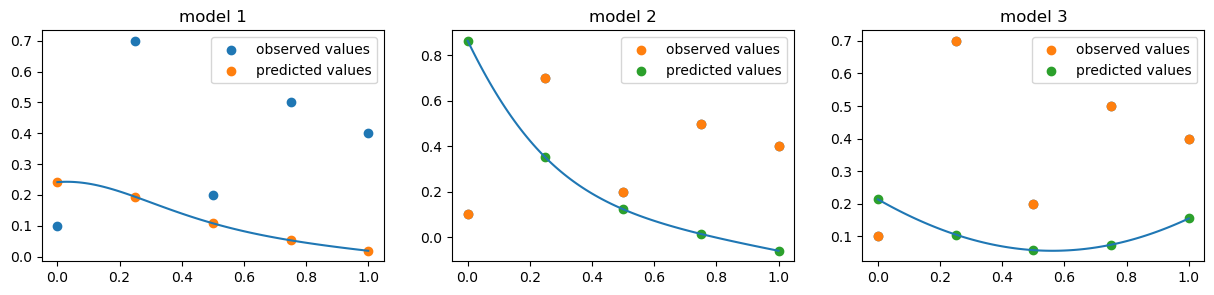

In [64]:


input_ = np.array([0,0.25,0.5,0.75,1])
#observed output
observed_output = np.array([0.1,0.7,0.2,0.5,0.4])



fig, ax = plt.subplots(1,3,figsize=(15,3))


#plot1 with model 1
x = np.linspace(0,1,101) 
y_pred = NN(input_,wb_arr_optimal)
y = NN(x,wb_arr_optimal)

ax[0].plot(x,y)
ax[0].scatter(input_,observed_output, label = 'observed values')
ax[0].scatter(input_, y_pred, label = 'predicted values')
ax[0].set_title('model 1')


#model 2
wb_arr[:4] = np.random.normal(loc = 0, scale = 4, size = 4)
wb_arr_optimal =  methpc(NNSSR, gradNNSSR, s=1e-4, x0 = wb_arr)
y_pred = NN(input_,wb_arr_optimal)
y = NN(x,wb_arr_optimal)


#plot 2
ax[1].plot(x,y)
ax[1].scatter(input_,observed_output)
ax[1].scatter(input_,observed_output, label = 'observed values')
ax[1].scatter(input_, y_pred, label = 'predicted values')
ax[1].set_title('model 2')



#model 3
wb_arr[:4] = np.random.normal(loc = 0, scale = 4, size = 4)
wb_arr_optimal =  methpc(NNSSR, gradNNSSR, s=1e-4, x0 = wb_arr) 
y_pred = NN(input_,wb_arr_optimal)
y = NN(x,wb_arr_optimal)

#plot 3
ax[2].plot(x,y)
ax[2].scatter(input_,observed_output)
ax[2].scatter(input_,observed_output, label = 'observed values')
ax[2].scatter(input_, y_pred, label = 'predicted values')
ax[2].set_title('model 3')


ax[0].legend()
ax[1].legend()
ax[2].legend()





Now, these three graphs show different behaviour each time, this means that the paramteres of the model are different each time. In fact, I get a different "optimal paramteter setup" each time I run the algorithm. I believe this can be explained as follows:

(mathsy bit)

My intuition on this is that the gradient descent algorithm is finding local minima in which it terminates. Beceause of the complexity of the parameter space, there will be many different local minima and we find ourselves in a different one each time because of the random initialisation of the weights. We can probably work around this by running the optimisation algorithm many times and choosing the one that gives us the best solution then saving for later.



### Trying to find our best fit

In [22]:
#create a wb global best fit
wb_opt_global = np.zeros(7)

In [ ]:
#input
input_ = np.array([0,0.25,0.5,0.75,1])
#observed output
observed_output = np.array([0.1,0.7,0.2,0.5,0.4])


wb_opt = np.zeros(7)
for n in range(0,70):
    wb_arr = np.zeros(7)
    #we initialise the weights as a normally distributed
    #random variable around 0
    
    #increasing the standard distribution helped me find more
    #extreme curves
    wb_arr[:4] = np.random.normal(loc = 0, scale = 40, size = 4)
    
    wb_arr_test = methpc(NNSSR, gradNNSSR, s=1e-3, x0 = wb_arr)
    
    if NNSSR(wb_arr_test) < NNSSR(wb_opt):
        wb_opt = wb_arr_test
    print(n)

print(wb_opt)

if NNSSR(wb_opt) < NNSSR(wb_opt_global):
    wb_opt_global = wb_opt
    


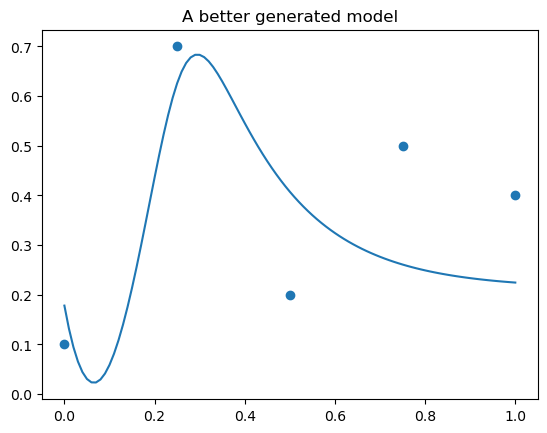

In [106]:
x = np.linspace(0,1,101) 
y = NN(x,wb_opt_global)


plt.plot(x,y)
plt.title('A better generated model')
plt.scatter(input_,observed_output)

As we can see, this curve fits our observed data quite a bit better than the random attempts. I anticipate that this is not very efficient and may be ineffective compared to other methods more modern to find a global minimum, but it gives us a decent result for an initial shot at the problem.

## Some notes

This was a very fun notebook. I got the chance to play around with the parameters for our intialisation and tolerence on gradient descent to find better solution sets. The global save of an optimal solution was also cool. Sadly, my current hardware isn't up to the computational tasks that this endeavour could demand, but I feel that I still achieved something here. I ran the code a few more times to geenrate a nice model. This is one of the best I got out. Feel free to play around with the generation in this notebook and mess around with the path length, tolerance (in methpc) and inital weight/bias values to see what you can get out :)

In [108]:
%store -r wb_opt_global_previous
print(wb_opt_global_previous)

[ -5.60158298 -28.08006136  66.80307215  -0.43280377  -3.03250468
   7.34421274   0.21265269]


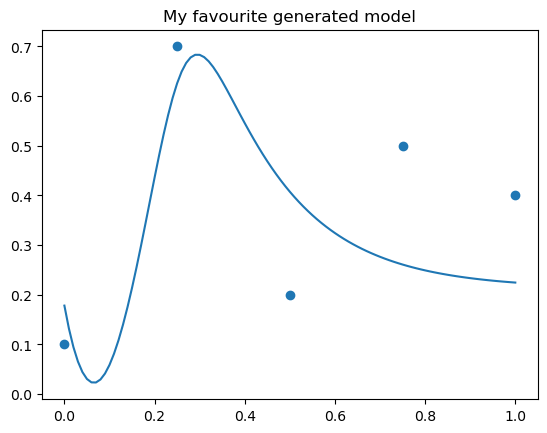

In [109]:
#Here's one I made earlier
x = np.linspace(0,1,101) 
y = NN(x,wb_opt_global)

plt.plot(x,y)
plt.title('My favourite generated model')
plt.scatter(input_,observed_output)